In [1]:
pip install patchify

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U segmentation-models

     ---------------------------------------- 0.0/50.7 kB ? eta -:--:--
     ------------------------------ ------- 41.0/50.7 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 50.7/50.7 kB 642.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [4]:
from patchify import patchify, unpatchify

In [5]:
import segmentation_models as sm # I need base version and tf.keras framework


Segmentation Models: using `tf.keras` framework.


In [6]:
import os
import cv2
from PIL import Image
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from matplotlib import pyplot as plt
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [8]:
pip install -U segmentation-models==0.2.1

     ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/45.0 kB ? eta -:--:--
     ----------------- -------------------- 20.5/45.0 kB 162.5 kB/s eta 0:00:01
     ------------------------- ------------ 30.7/45.0 kB 186.2 kB/s eta 0:00:01
     -------------------------------------- 45.0/45.0 kB 222.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/76.5 kB ? eta -:--:--
     -------------------------- ------------- 51.2/76.5 kB 1.3 MB/s eta 0:00:01
     ---------------------------------------- 76.5/76.5 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: image-classifiers
    Found existing installation: image-classifiers 1.0.0
    Uninstalling image-classifiers-1.0.0:
      Successfully uninstalled image-classifiers-1.0.0
  Attempting uninstall: segmentation-models
    Found existing installation: segmentation-models 1.0.1
    Uninstalling segmentation-models-1.0.1:
      Successfully uninstalled segmentat

In [15]:
# C:\Users\tonmo\Jupyter Notebook\Semantic segmentation dataset
dataset_root_folder = 'C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset'
dataset_name = 'Semantic segmentation dataset'

In [16]:
for path, subdirs,files in os.walk(dataset_root_folder):
  print(path)

C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 1
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 1\images
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 1\masks
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 2
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 2\images
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 2\masks
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 3
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 3\images
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 3\masks
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 4
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 4\images
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation dataset\Tile 4\masks
C:/Users/tonmo/Jupyter Notebook/Semantic segmentation data

In [17]:
for path,subdirs,files in os.walk(dataset_root_folder):
  dir_name = path.split(os.path.sep)[-1]
  # print(dir_name)
  if dir_name == "images":
    images = os.listdir(path)
    for image in images:
      if (image.endswith('.jpg')):
        print(image)

image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_008.jpg
image_part_009.jpg
image_part_001.jpg
image_part_002.jpg
image_part_003.jpg
image_part_004.jpg
image_part_005.jpg
image_part_006.jpg
image_part_007.jpg
image_part_0

In [18]:
image_patch_size = 256

In [23]:
image = cv2.imread(f'C:/Users/tonmo/Jupyter Notebook/{dataset_name}/Tile 5/images/image_part_001.jpg')
print(image)
print(image.shape)

[[[23 25 35]
  [25 27 37]
  [23 25 35]
  ...
  [61 48 56]
  [59 46 54]
  [58 45 53]]

 [[29 31 41]
  [34 36 46]
  [33 35 45]
  ...
  [59 46 54]
  [60 47 55]
  [62 49 57]]

 [[30 32 42]
  [39 41 51]
  [41 43 53]
  ...
  [56 43 51]
  [57 44 52]
  [61 48 56]]

 ...

 [[21 18 20]
  [33 31 31]
  [32 29 31]
  ...
  [ 8  3  4]
  [ 8  3  4]
  [ 8  3  4]]

 [[18 18 18]
  [18 19 17]
  [19 19 19]
  ...
  [11  6  7]
  [11  6  7]
  [13  8  9]]

 [[17 18 16]
  [18 19 17]
  [19 20 18]
  ...
  [11  6  7]
  [10  5  6]
  [12  7  8]]]
(1058, 1126, 3)


In [24]:
patched_image = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
print(patched_image.shape)

(4, 4, 1, 256, 256, 3)


In [25]:
minmaxscaler = MinMaxScaler()
image_x = patched_image[0,0,:,:]

print(image_x.shape)
image_y = minmaxscaler.fit_transform(image_x.reshape(-1,1)).reshape(image_x.shape) #Converting into vector, normalizing it and then restoring the matrix
print(image_y[0].shape)
print(image_y)

(1, 256, 256, 3)
(256, 256, 3)
[[[[0.09311741 0.10121457 0.1417004 ]
   [0.10121457 0.10931174 0.14979757]
   [0.09311741 0.10121457 0.1417004 ]
   ...
   [0.15789474 0.17004049 0.20242915]
   [0.15789474 0.17004049 0.20242915]
   [0.1417004  0.15384615 0.18623482]]

  [[0.11740891 0.12550607 0.1659919 ]
   [0.13765182 0.14574899 0.18623482]
   [0.13360324 0.1417004  0.18218623]
   ...
   [0.1417004  0.15384615 0.18623482]
   [0.13765182 0.14979757 0.18218623]
   [0.12145749 0.13360324 0.1659919 ]]

  [[0.12145749 0.12955466 0.17004049]
   [0.15789474 0.1659919  0.20647773]
   [0.1659919  0.17408907 0.2145749 ]
   ...
   [0.11740891 0.12955466 0.16194332]
   [0.10931174 0.12145749 0.15384615]
   [0.09311741 0.10526316 0.13765182]]

  ...

  [[0.10931174 0.13360324 0.16194332]
   [0.11740891 0.1417004  0.17004049]
   [0.18623482 0.21052632 0.2388664 ]
   ...
   [0.13765182 0.16194332 0.1902834 ]
   [0.18218623 0.20647773 0.23481781]
   [0.15384615 0.17813765 0.20647773]]

  [[0.10931174

In [26]:
image = Image.fromarray(image)
print(type(image))
print(image)

<class 'PIL.Image.Image'>
<PIL.Image.Image image mode=RGB size=1126x1058 at 0x1F2BB0C39D0>


In [31]:
dataset_root = 'C:/Users/tonmo/Jupyter Notebook/'

In [32]:
files = os.scandir(dataset_root+dataset_name+"/Tile 1/images")
print(len([file for file in files]))

9


In [33]:
image = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
# print(help(patchify))
print(image[1][3])
patches = patchify(image, (2,2), step=3) # split image into 2*3 small 2*2 patches.
print(type(patches))
print(patches.shape)
# assert patches.shape == (2, 3, 2, 2)
# reconstructed_image = unpatchify(patches, image.shape)

# assert (reconstructed_image == image).all()

8
<class 'numpy.ndarray'>
(1, 1, 2, 2)


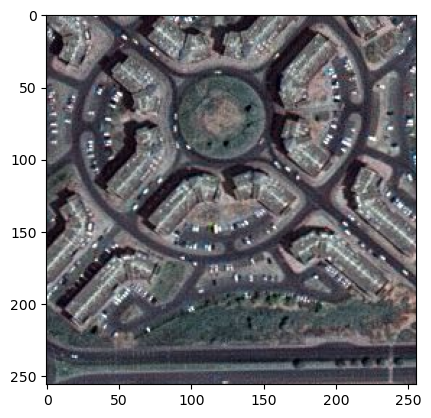

In [34]:
 image_patch_size = 256


image  = cv2.imread(f'{dataset_root}/{dataset_name}/Tile 2/images/image_part_005.jpg')
patched_image  = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size) #dividing the image into patches
# print(type(patched_image[0,0,0,:]))
# print(patched_image[0,0,0,:])
image = Image.fromarray(patched_image[0,0,0,:])

plt.imshow(image)

In [35]:
array = []
array.append(1)
array.append("yes")
print(array)

[1, 'yes']


In [37]:
image_id = 1
image_extension = 'jpg'
tile_id = 5
image_type = 'images'
image = cv2.imread(f'{dataset_root_folder}{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}')
print(image)

None


In [40]:
minmaxscaler = MinMaxScaler()
image_patch_size = 256
image_dataset = []
mask_dataset = []
for image_type in ['images','masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  else:
    image_extension = 'png'

  for tile_id in range(1,8):

    for image_id in range(1,10):

      image = cv2.imread(f'{dataset_root}{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}')
      if image is not None:

        if image_type == 'masks':
          image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


        # making the size multiple of pat
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        # print(f'{image.shape} - {size_x},{size_y}')

        cropped_image = image[0:size_y, 0:size_x] #cropping on array is faster than converting into image cropping and back

        # image = Image.fromarray(image)
        # image = image.crop((0,0,size_x,size_y)) #topleftx toplefty bottomrightx bottomrighty
        # image = np.array(image)

        patched_images = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

        for i in range(patched_images.shape[0]):

          for j in range(patched_images.shape[1]):

            if image_type == 'images':
              current_patched_image = patched_images[i,j,0,:]
              current_patched_image = minmaxscaler.fit_transform(current_patched_image.reshape(-1,1)).reshape(current_patched_image.shape) #normalization
              image_dataset.append(current_patched_image)
            else:
              current_patched_mask = patched_images[i,j,0,:]
              mask_dataset.append(current_patched_mask)

In [42]:
image_dataset  = np.array(image_dataset)
mask_dataset  = np.array(mask_dataset)

print(type(image_dataset))
print(type(mask_dataset))

print(image_dataset[0].shape)
print(mask_dataset[0].shape)

print(type(image_dataset[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(256, 256, 3)
(256, 256, 3)
<class 'numpy.ndarray'>


In [43]:
print(image_dataset.shape)

(945, 256, 256, 3)


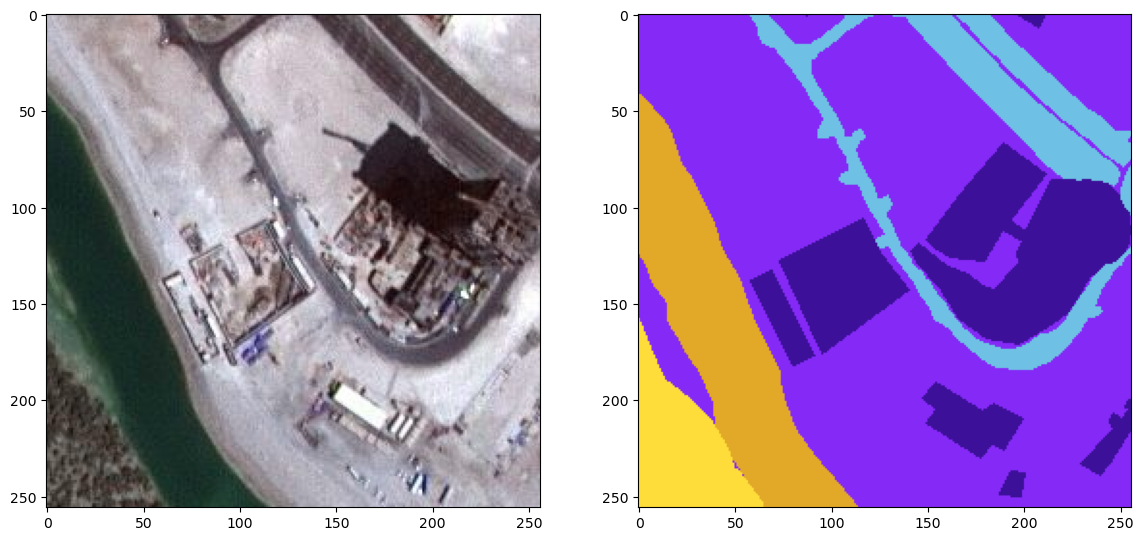

In [44]:
random_image_id = random.randint(0,len(image_dataset))
plt.figure(figsize=(14,8)) #width height
plt.subplot(121) #numRows numColumns Position
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [45]:
class_building  = '#3C1098'.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_building)

class_land  = '#8429F6'.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_land)

class_road  = '#6EC1E4'.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_road)

class_vegetation  = '#FEDD3A'.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_vegetation)

class_water  = '#E2A929'.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_water)

class_unlabelled  = '#9B9B9B'.lstrip('#')
class_unlabelled = np.array(tuple(int(class_unlabelled[i:i+2],16) for i in (0,2,4))) #converting hex to RGB values of color
print(class_unlabelled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [46]:
print(mask_dataset.shape)
arr = [[1,2,3],[1,5,3]]
print(np.unique(arr))
labl = np.array([1,2,3])
print(labl)
print(arr==labl)
np.all(arr==labl,axis=-1)

(945, 256, 256, 3)
[1 2 3 5]
[1 2 3]
[[ True  True  True]
 [ True False  True]]


array([ True, False])

In [47]:
print(np.all([[True,True,False],[False,True,True]],axis=1))

[False False]


In [48]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape,dtype = np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabelled, axis=-1)] = 5
  label_segment = label_segment[:,:,0]
  return label_segment

In [50]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [51]:
print(len(labels))
print(labels[0].shape)
print(labels[0])
labels = np.array(labels)

945
(256, 256)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


In [52]:
labels = np.expand_dims(labels,axis=3)

In [53]:
print("Total unique values {}".format(np.unique(labels)))
print(labels.shape)

Total unique values [0 1 2 3 4 5]
(945, 256, 256, 1)


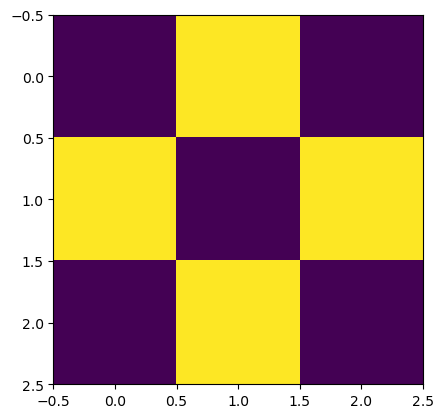

In [54]:
colValues = np.array([[1,2,1],[2,1,2],[1,2,1]])
plt.imshow(colValues)

(256, 256, 3)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


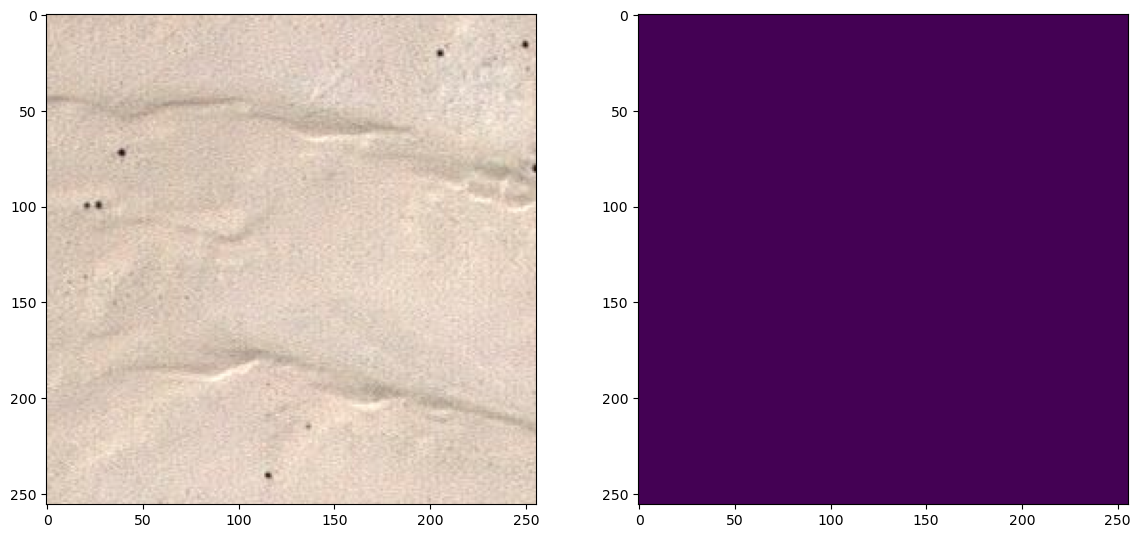

In [55]:
random_image_id = random.randint(0,len(image_dataset))
plt.figure(figsize=(14,14)) #width height
plt.subplot(221) #numRows numColumns Position
plt.imshow(image_dataset[random_image_id])
print(image_dataset[0].shape)
print(labels[random_image_id][:,:,0])

plt.subplot(222)
plt.imshow(labels[random_image_id][:,:,0]) #assigns a random color to each distinct value in the ndarray

In [56]:
total_classes = len(np.unique(labels))
print(total_classes)
print(labels[0,0,0])

6
[1]


In [57]:
values = [[1,2,3],[4,5,6]]
cat_values = to_categorical(values,7)
print(cat_values)

[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]]

 [[0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


In [58]:
labels_categorical_dataset = to_categorical(labels,num_classes=total_classes) # converting 1 to 0,1,0,0,0,0
print(labels_categorical_dataset.shape)
print(labels_categorical_dataset[0][0][0])

(945, 256, 256, 6)
[0. 1. 0. 0. 0. 0.]


In [59]:
master_training_dataset = image_dataset
print(master_training_dataset.shape)

(945, 256, 256, 3)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset,labels_categorical_dataset,test_size=0.15,random_state=100)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [62]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]
print(image_height,image_width,image_channels,total_classes)

256 256 3 6


In [63]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [64]:
from keras import backend as K

In [65]:
def jaccard_coef(y_true,y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum( y_true_flatten * y_pred_flatten)
  final_coef_value = (intersection + 1.0) / ( K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [66]:
def multi_unet_model(n_classes=5,image_height=256, image_width = 256, image_channels=1):

  inputs = Input((image_height,image_width,image_channels)) #defines the input layer of the neural network, creaters a tensor of the specified dimensions
  print("Input shape",inputs.shape)
  source_input = inputs

  c1 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(source_input)
  print(c1.shape)
  c1 = Dropout(0.2)(c1)
  print(c1.shape)
  c1 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c1)
  print(c1.shape)
  p1 = MaxPooling2D((2,2))(c1)
  print(p1.shape)

  c2 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p1)
  print(c2.shape)
  c2 = Dropout(0.2)(c2)
  print(c2.shape)
  c2 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c2)
  print(c2.shape)
  p2 = MaxPooling2D((2,2))(c2)
  print(p2.shape)

  c3 = Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p2)
  print(c3.shape)
  c3 = Dropout(0.2)(c3)
  print(c3.shape)
  c3 = Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c3)
  print(c3.shape)
  p3 = MaxPooling2D((2,2))(c3)
  print(p3.shape)

  c4 = Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p3)
  print(c4.shape)
  c4 = Dropout(0.2)(c4)
  print(c4.shape)
  c4 = Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c4)
  print(c4.shape)
  p4 = MaxPooling2D((2,2))(c4)
  print(p4.shape)

  c5 = Conv2D(256,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(p4)
  print(c5.shape)
  c5 = Dropout(0.2)(c5)
  print(c5.shape)
  c5 = Conv2D(256,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c5)
  print(c5.shape)

  u6 = Conv2DTranspose(128,(2,2),strides=(2,2),padding="same")(c5)
  print(u6.shape)
  u6 = concatenate([u6,c4])
  print(u6.shape)
  c6 = Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u6)
  print(c6.shape)
  c6 = Dropout(0.2)(c6)
  print(c6.shape)
  c6 = Conv2D(128,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c6)
  print(c6.shape)

  u7 = Conv2DTranspose(64,(2,2),strides=(2,2),padding="same")(c6)
  print(u7.shape)
  u7 = concatenate([u7,c3])
  print(u7.shape)
  c7 = Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u7)
  print(c7.shape)
  c7 = Dropout(0.2)(c7)
  print(c7.shape)
  c7 = Conv2D(64,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c7)
  print(c7.shape)

  u8 = Conv2DTranspose(32,(2,2),strides=(2,2),padding="same")(c7)
  print(u8.shape)
  u8 = concatenate([u8,c2])
  print(u8.shape)
  c8 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u8)
  print(c8.shape)
  c8 = Dropout(0.2)(c8)
  print(c8.shape)
  c8 = Conv2D(32,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c8)
  print(c8.shape)

  u9 = Conv2DTranspose(16,(2,2),strides=(2,2),padding="same")(c8)
  print(u9.shape)
  u9 = concatenate([u9,c1], axis=3)
  print(u9.shape)
  c9 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(u9)
  print(c9.shape)
  c9 = Dropout(0.2)(c9)
  print(c9.shape)
  c9 = Conv2D(16,(3,3),activation="relu",kernel_initializer="he_normal",padding="same")(c9)
  print(c9.shape)

  outputs = Conv2D(n_classes,(1,1),activation="softmax")(c9)
  print(outputs.shape)
  model = Model(inputs=[inputs],outputs=[outputs])
  return model

In [67]:
metrics = ['accuracy', jaccard_coef]

In [68]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [69]:
model = get_deep_learning_model()


Input shape (None, 256, 256, 3)
(None, 256, 256, 16)
(None, 256, 256, 16)
(None, 256, 256, 16)

(None, 128, 128, 16)
(None, 128, 128, 32)
(None, 128, 128, 32)
(None, 128, 128, 32)
(None, 64, 64, 32)
(None, 64, 64, 64)
(None, 64, 64, 64)
(None, 64, 64, 64)
(None, 32, 32, 64)
(None, 32, 32, 128)
(None, 32, 32, 128)
(None, 32, 32, 128)
(None, 16, 16, 128)
(None, 16, 16, 256)
(None, 16, 16, 256)
(None, 16, 16, 256)
(None, 32, 32, 128)
(None, 32, 32, 256)
(None, 32, 32, 128)
(None, 32, 32, 128)
(None, 32, 32, 128)
(None, 64, 64, 64)
(None, 64, 64, 128)
(None, 64, 64, 64)
(None, 64, 64, 64)
(None, 64, 64, 64)
(None, 128, 128, 32)
(None, 128, 128, 64)
(None, 128, 128, 32)
(None, 128, 128, 32)
(None, 128, 128, 32)
(None, 256, 256, 16)
(None, 256, 256, 32)
(None, 256, 256, 16)
(None, 256, 256, 16)
(None, 256, 256, 16)
(None, 256, 256, 6)


In [70]:
model.get_config() #this function is used with keras, and operated on the model returned by that function

{'name': 'model',
 'trainable': True,
 'layers': [{'module': 'keras.layers',
   'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'registered_name': None,
   'name': 'input_1',
   'inbound_nodes': []},
  {'module': 'keras.layers',
   'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'module': 'keras.initializers',
     'class_name': 'HeNormal',
     'config': {'seed': None},
     'registered_name': None},
    'bias_initializer': {'module': 'keras.initializers',
     'class_name': 'Zeros',
     'config': {},
     'registered_name': None},
    'kernel_regularizer': N

In [71]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         448       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

 conv2d_transpose_3 (Conv2D  (None, 256, 256, 16)         2064      ['conv2d_15[0][0]']           
 Transpose)                                                                                       
                                                                                                  
 concatenate_3 (Concatenate  (None, 256, 256, 32)         0         ['conv2d_transpose_3[0][0]',  
 )                                                                   'conv2d_1[0][0]']            
                                                                                                  
 conv2d_16 (Conv2D)          (None, 256, 256, 16)         4624      ['concatenate_3[0][0]']       
                                                                                                  
 dropout_8 (Dropout)         (None, 256, 256, 16)         0         ['conv2d_16[0][0]']           
                                                                                                  
 conv2d_17

In [72]:
weights = [1/6]*6

In [73]:
print(help(sm.losses.DiceLoss()))

Help on DiceLoss in module segmentation_models.losses object:

dice_loss = class DiceLoss(segmentation_models.base.objects.Loss)
 |  dice_loss(beta=1, class_weights=None, class_indexes=None, per_image=False, smooth=1e-05)
 |  
 |  Creates a criterion to measure Dice loss:
 |  
 |  .. math:: L(precision, recall) = 1 - (1 + \beta^2) \frac{precision \cdot recall}
 |      {\beta^2 \cdot precision + recall}
 |  
 |  The formula in terms of *Type I* and *Type II* errors:
 |  
 |  .. math:: L(tp, fp, fn) = \frac{(1 + \beta^2) \cdot tp} {(1 + \beta^2) \cdot fp + \beta^2 \cdot fn + fp}
 |  
 |  where:
 |       - tp - true positives;
 |       - fp - false positives;
 |       - fn - false negatives;
 |  
 |  Args:
 |      beta: Float or integer coefficient for precision and recall balance.
 |      class_weights: Array (``np.array``) of class weights (``len(weights) = num_classes``).
 |      class_indexes: Optional integer or list of integers, classes to consider, if ``None`` all classes are used.

In [74]:
dice_loss = sm.losses.DiceLoss(class_weights=weights)
focal_loss = sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1*focal_loss)

In [75]:
import tensorflow as tf

In [76]:
tf.keras.backend.clear_session()

In [77]:
model.compile(optimizer="adam",loss=total_loss,metrics=metrics)

In [78]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [79]:
model_history = model.fit(X_train,
                          y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10,
                          validation_data = (X_test,y_test),
                          shuffle=False)

Epoch 1/10
Cause: Unable to locate the source code of <function SumOfLosses.__call__ at 0x000001F2AB8B25C0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function SumOfLosses.__call__ at 0x000001F2AB8B25C0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this w

In [81]:
history_a = model_history

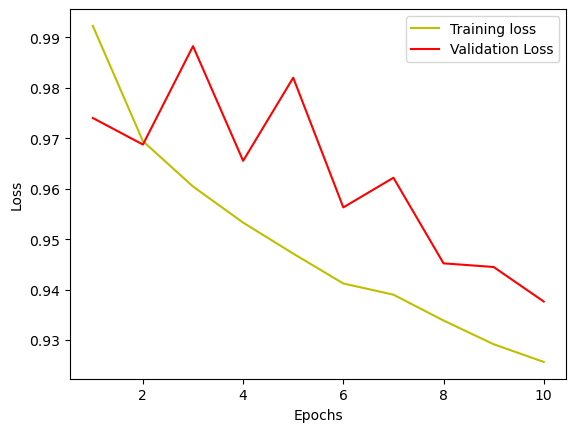

In [82]:
loss = history_a.history["loss"]
val_loss = history_a.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label="Training loss")
plt.plot(epochs,val_loss,'r',label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()